In [ ]:
Apple_cost = 100
current_tax = 0.1
peacies = 2
total_cost = Apple_cost * (1 + current_tax) * peacies
print("total_cost:", total_cost)


class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    # 順伝播(行き)：ただの掛け算
    def forward(self, x, y):
        self.x = x  # 逆伝播のために覚えておく！
        self.y = y  # 逆伝播のために覚えておく！
        out = x * y
        return out

    # 逆伝播(帰り)：ひっくり返して掛ける
    def backward(self, dout):
        # dout は「上流から流れてきた微分」(さっきの例だと 1.1)
        dx = dout * self.y  # xの勾配には y を掛ける
        dy = dout * self.x  # yの勾配には x を掛ける

        return dx, dy


# 1. レイヤを作る
mul_apple_layer = MulLayer()  # リンゴ * 個数
mul_tax_layer = MulLayer()  # (リンゴ*個数) * 消費税

# 2. 順伝播(買い物をする)
apple = 100
apple_num = 2
tax = 1.1

# 最初の計算: 100 * 2 = 200
apple_price = mul_apple_layer.forward(apple, apple_num)
# 次の計算: 200 * 1.1 = 220
price = mul_tax_layer.forward(apple_price, tax)

print(f"支払金額: {price}")

# 3. 逆伝播(犯人探し)
d_price = 1  # スタートの信号は常に 1
d_apple_price, d_tax = mul_tax_layer.backward(d_price)
d_apple, d_apple_num = mul_apple_layer.backward(d_apple_price)

print(f"リンゴの値段の勾配: {d_apple}")
print(f"リンゴの個数の勾配: {d_apple_num}")
print(f"消費税の勾配: {d_tax}")

total_cost: 220.00000000000003
支払金額: 220.00000000000003
リンゴの値段の勾配: 2.2
リンゴの個数の勾配: 110.00000000000001
消費税の勾配: 200


In [3]:
class AddLayer:
    def __init__(self):
        pass  # 何も覚える必要なし

    def forward(self, x, y):
        return x + y

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy


# レイヤの準備
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# --- 1. 順伝播 (Forward) ---
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# リンゴの値段
apple_price = mul_apple_layer.forward(apple, apple_num)  # 200
# ミカンの値段
orange_price = mul_orange_layer.forward(orange, orange_num)  # 450
# 合算
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # 650
# 消費税込み
price = mul_tax_layer.forward(all_price, tax)  # 715

print(f"支払総額: {price}")

# --- 2. 逆伝播 (Backward) ---
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # 1.1 と 650
dapple_price, dorange_price = add_apple_orange_layer.backward(
    dall_price
)  # そのまま流す
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # ？？？
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f"ミカンの値段の勾配(dorange): {dorange}")

支払総額: 715.0000000000001
ミカンの値段の勾配(dorange): 3.3000000000000003


In [4]:
# class SFC_Polymath_2026(UniversityStudent):
#     def __init__(self):
#         # 1. Computer Science (The Backbone)
#         self.cs_foundation = {
#             "Algorithms": "Master",
#             "Philosophy": "Absorb",
#             "Architecture": "Build",
#         }
#         # 2. Mathematics (The Engine)
#         self.math_engine = {
#             "Matrix": "Visualize",
#             "Calculus": "Derive",
#             "Prob_Stats": "Intuition",
#         }

#         # 3. Artificial Intelligence (The Brain)
#         self.ai_core = [
#             "Deep Learning (Scratch)",
#             "Machine Learning (Scikit-Learn)",
#             "Reinforcement Learning",
#         ]

#         # 4. Large Language Models (The Soul)
#         self.llm_capability = {
#             "Architecture": "Transformer",
#             "Application": "RAG & Agents",
#             "Creation": "Fine-tuning",
#         }

#         # 5. World Creation (The Stage)
#         self.simulation = "Unity ML-Agents (Simulate the World)"

#     def run_year_2025(self):

#         while True:
#             try:
#                 knowledge = self.read_all_books(library_path="./My_Weaponry")
#                 self.connect_dots(math=self.math_engine, code=self.cs_foundation)
#                 project = self.create_polaris(
#                     ai=self.ai_core, llm=self.llm_capability, sim=self.simulation
#                 )
#                 print(f"World Changed: {project}")
#             except BurnOutError:
#                 self.sleep(8)
#                 self.restart()

In [5]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy


apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)


class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

220.00000000000003


In [6]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

print(price)

dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [7]:
# 5.5 活性化関数レイヤの実装
##5.5.1 ReLUレイヤ
import numpy as np


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = x <= 0
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = x <= 0
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


In [8]:
##5.5.2 Sigmoidレイヤ
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [9]:
# 5.6 Affine / Softmaxレイヤ
# 5.6.1 Affineレイヤ

X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

X.shape
W.shape
B.shape

Y = np.dot(X, W) + B

X_dot_W = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([1, 2, 3])

print(X_dot_W)

print(X_dot_W + B)

dY = np.array([[1, 2, 3], [4, 5, 6]])
print(dY)

dB = np.sum(dY, axis=0)
print(dB)

[[1 2 3]
 [4 5 6]]
[[2 4 6]
 [5 7 9]]
[[1 2 3]
 [4 5 6]]
[5 7 9]


In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):

        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        # パズルタイム開始

        # dx(入力への勾配)を作るには、Wをひっくり返して(T)掛ける
        dx = np.dot(dout, self.W.T)

        # dW(重みへの勾配)を作るには、xをひっくり返して(T)掛ける
        self.dW = np.dot(self.x.T, dout)

        # db(バイアスへの勾配)は、縦方向に合計する(ここは丸暗記でいい)
        self.db = np.sum(dout, axis=0)

        return dx

In [11]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

In [ ]:
import sys, os

# 親ディレクトリのファイルを読み込めるようにパスを通す。
# 'deep-learning-from-scratch' フォルダの階層構造に依存した記述だ。
sys.path.append(os.path.join(os.pardir, "deep-learning-from-scratch"))

import numpy as np

# 著者が用意したカスタムレイヤ(部品)をインポート。
# ここに Affine, Relu, SoftmaxWithLoss の実装が隠蔽されている。
from common.layers import *

# 数値微分用関数(デバッグや比較検証用)
from common.gradient import numerical_gradient

# 順序付き辞書。Architectが言った通り、レイヤの順番保持に必須だ。
from collections import OrderedDict


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        print(f"WI.shape = {self.params["W1"].shape}")
        print(self.params["b1"].shape)
        print(self.params["W2"].shape)
        print(self.params["b2"].shape)

        print(self.params["W1"])
        print(self.params["b1"])
        print(self.params["W2"])
        print(self.params["b2"])

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
        self.layers["Relu1"] = Relu()
        self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        # 修正箇所: layers (複数形) ではなく layer (単数形) で回す
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    # x: 入力データ, t: 教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

    def gradient(self, x, t):
        # 1. forward
        self.loss(x, t)

        # 2. backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 3. 設定
        grads = {}
        grads["W1"] = self.layers["Affine1"].dW
        grads["b1"] = self.layers["Affine1"].db
        grads["W2"] = self.layers["Affine2"].dW
        grads["b2"] = self.layers["Affine2"].db

        return grads

In [ ]:
# -------------------------------------------------------
# 以下、動作確認用コード(Gradient Check)
# -------------------------------------------------------

if __name__ == "__main__":
    # 1. データの準備(ダミーデータ)
    # 入力: 3個のデータ、それぞれのサイズは784 (MNISTと同じ)
    x_batch = np.random.rand(3, 784)
    # 正解: 3個のデータ、それぞれの正解ラベル(0~9のランダムな数字)
    t_batch = np.random.randint(0, 10, 3)

    # 2. ネットワークの生成(インスタンス化)
    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

    print("-------------------------------------------------------")
    print("Calculated Gradients... (This may take a few seconds)")

    # 3. 勾配の計算
    # (A) 数値微分(前章のやり方：確実だが遅い)
    grad_numerical = network.numerical_gradient(x_batch, t_batch)

    # (B) 誤差逆伝播法(今回のやり方：高速)
    grad_backprop = network.gradient(x_batch, t_batch)

    # 4. 誤差の検証
    # 各重みパラメータについて、(A)と(B)の差の平均を計算する
    print("\n[ Gradient Check Result ]")

    total_diff = 0
    count = 0

    for key in grad_numerical.keys():
        # 数値微分と逆伝播法の差分をとる
        diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
        print(f"{key}: {diff:.10f}")  # 小数点以下10桁まで表示

        total_diff += diff
        count += 1

    print("-------------------------------------------------------")
    if total_diff / count < 1e-5:
        print("✅ Success! 誤差逆伝播法の実装は正確です。")
        print("   (数値微分との誤差が極めて小さいことが確認できました)")
    else:
        print("❌ Warning! 誤差が大きすぎます。実装を見直してください。")

WI.shape = (784, 50)
(50,)
(50, 10)
(10,)
[[-0.00620743  0.00993943 -0.01080228 ... -0.01929413 -0.01290581
   0.00362745]
 [ 0.00178094 -0.02533698 -0.00347192 ...  0.00751598  0.02319368
   0.00875932]
 [-0.00484232 -0.00806059  0.02116629 ... -0.00067128  0.00412246
   0.00418618]
 ...
 [-0.00187789  0.01189441  0.00820527 ... -0.00252333 -0.01069286
   0.01449054]
 [ 0.00799067 -0.00106388 -0.01523776 ... -0.01258832 -0.00753093
  -0.00234407]
 [ 0.01321599 -0.00240191  0.00560029 ...  0.00077052 -0.00973336
   0.02315744]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[[-4.61553316e-03 -9.26057416e-03  4.75814392e-03 -6.88999408e-03
  -1.46587583e-02  1.21653057e-02  6.52179525e-03 -1.55299892e-02
  -1.10770955e-02  8.32102100e-03]
 [ 6.52100741e-03 -7.11140047e-03  8.16208890e-05  6.64565297e-03
   3.28986042e-03 -2.35491529e-02  2.38045502e-02 -1.55480690e-02
   5.26810867

In [14]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        print(f"[Forward] x={x}, y={y}, out={out}")

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        print(f"[Backward] dout={dout}, dx={dx},dy={dy}")

        return dx, dy

In [15]:
apple = 100
appple_num = 3
tax = 1.1

# レイヤの作成
mul_applelayer = MulLayer()
mul_tax_layer = MulLayer()

# Forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(f"最終価格: {price}")

# Backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, apple_num = mul_apple_layer.backward(dapple_price)

print(f"dApple: {dapple}, dApple_num: {dapple_num}, dTax: {dtax}")

[Forward] x=200, y=1.1, out=220.00000000000003
最終価格: 220.00000000000003
[Backward] dout=1, dx=1.1,dy=200
dApple: 2.2, dApple_num: 110.00000000000001, dTax: 200


In [2]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------- -------------------------- 2.6/8.0 MB 15.3 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 13.3 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 10.4 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.6 MB/s  0:00:01
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   - -------------------------------------- 1.0/36.3 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/36.3 MB 6.3 MB/s eta 0:00:06
   ----- ---------------------------------- 5.0/36.3 MB 8.0 MB/s eta 0:00:04
   ---------- ----------------------------- 9.2/36.3 MB 11.0 MB/s eta 0:00:03
   --------------- ------------------------ 14.4/36.3 MB 13.9 MB/s eta 0:00:02
   --------------

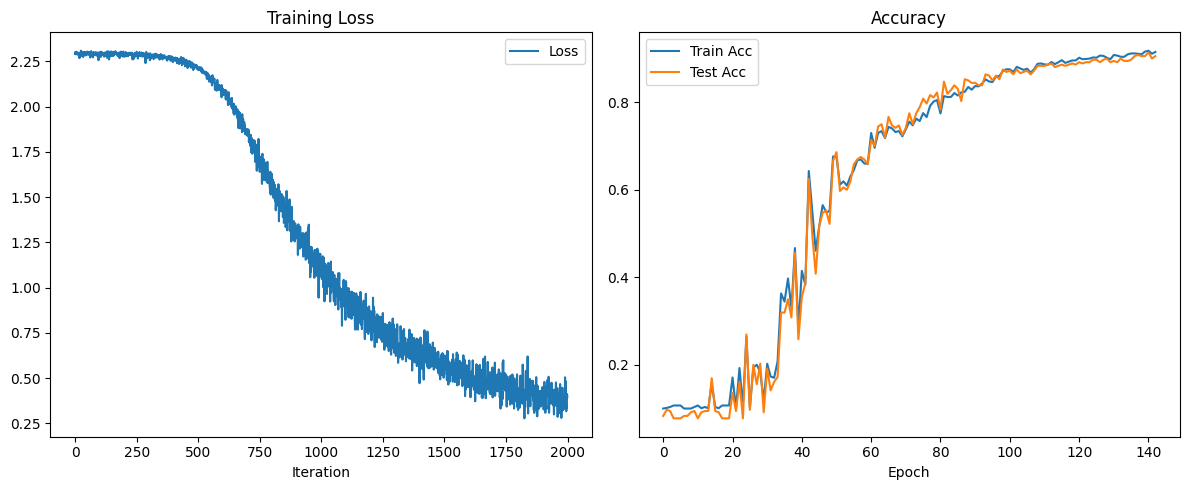

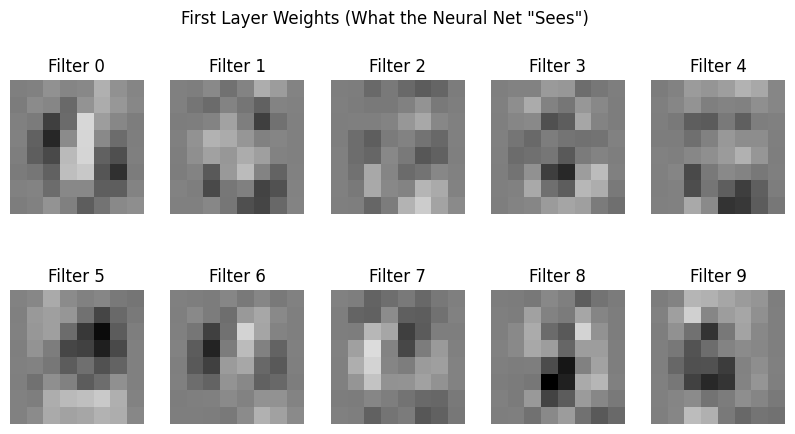

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# === 0. Data Preparation (The Material) ===
# We use sklearn's digits (8x8) as a mini-MNIST
digits = load_digits()
X = digits.data
X = (X - X.min()) / (X.max() - X.min())  # Normalize 0-1
y = digits.target

# One-hot encoding
num_classes = 10
T = np.zeros((y.size, num_classes))
for i in range(y.size):
    T[i, y[i]] = 1

X_train, X_test, t_train, t_test = train_test_split(
    X, T, test_size=0.2, random_state=42
)


# === 1. The Tools (Activation & Loss) ===
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(x):
    # Prevent overflow
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


# === 2. The Blueprint (TwoLayerNet) ===
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # Weight Initialization
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        # Forward
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # Backward
        batch_size = x.shape[0]
        dy = (y - t) / batch_size

        grads = {}
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = dz1 * (1.0 - z1) * z1  # Sigmoid derivative

        grads["W1"] = np.dot(x.T, da1)
        grads["b1"] = np.sum(da1, axis=0)

        return grads


# === 3. Construction (Training Loop) ===
network = TwoLayerNet(input_size=64, hidden_size=50, output_size=10)

iters_num = 2000
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(int(train_size / batch_size), 1)

for i in range(iters_num):
    # Mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]

    # Gradient
    grad = network.gradient(x_batch, t_batch)

    # Update
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, t_train)
        test_acc = network.accuracy(X_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

# === 4. Visual Inspection (What did it learn?) ===
# Visualizing Weights (W1)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss & Accuracy
axes[0].plot(train_loss_list, label="Loss")
axes[0].set_title("Training Loss")
axes[0].set_xlabel("Iteration")
axes[0].legend()

axes[1].plot(train_acc_list, label="Train Acc")
axes[1].plot(test_acc_list, label="Test Acc")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].legend()

plt.tight_layout()
plt.savefig("vol1_training_results.png")

# Visualize Filters (W1)
# W1 shape is (64, 50). Each column is a filter for 8x8 image.
plt.figure(figsize=(10, 5))
scale = np.abs(network.params["W1"]).max()
for i in range(10):  # Show first 10 filters
    plt.subplot(2, 5, i + 1)
    plt.imshow(
        network.params["W1"][:, i].reshape(8, 8),
        cmap=plt.cm.gray,
        vmin=-scale,
        vmax=scale,
    )
    plt.axis("off")
    plt.title(f"Filter {i}")
plt.suptitle('First Layer Weights (What the Neural Net "Sees")')
plt.savefig("vol1_weights_viz.png")